# Example of Neyman-Pearson (NP) Classification Algorithms
### Richard Zhao, Yang Feng, Jingyi Jessica Li and Xin Tong

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from nproc import npc

In [3]:
test = npc()

np.random.seed(1)

In [4]:
# Create a dataset (x,y) with 2 features, binary label and sample size 10000.
n = 10000
x = np.random.normal(0, 1, (n,2))
c = 1+3*x[:,0]
y = np.random.binomial(1, 1/(1+np.exp(-c)), n) 
x

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       ...,
       [ 1.10957003, -0.94320839],
       [ 0.78221575,  2.4084338 ],
       [ 0.88278555, -0.09959631]])

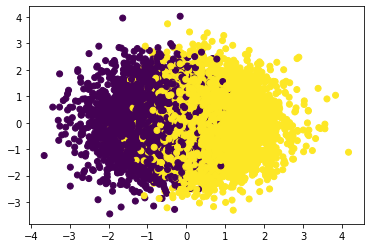

In [5]:
# Plot the dataset
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [6]:
# Call the npc function to construct Neyman-Pearson classifiers.
# The default type I error rate upper bound is alpha=0.05.
fit = test.npc(x, y, 'logistic', n_cores=os.cpu_count())

In [7]:
# Evaluate the prediction of the NP classifier fit on a test set (xtest, ytest).
x_test = np.random.normal(0, 1, (n,2))
c_test = 1+3*x_test[:,0]
y_test = np.random.binomial(1, 1/(1+np.exp(-c_test)), n)

In [8]:
# Calculate the overall accuracy of the classifier as well as the realized 
# type I error rate on test data.
# Strictly speaking, to demonstrate the effectiveness of the fit classifier 
# under the NP paradigm, we should repeat this experiment many times, and 
# show that in 1 - delta of these repetitions, type I error rate is smaller than alpha.

fitted_score = test.predict(fit,x)
print("Accuracy on training set:", accuracy_score(fitted_score[0], y))
pred_score = test.predict(fit,x_test)
print("Accuracy on test set:", accuracy_score(pred_score[0], y_test))

Accuracy on training set: 0.7445
Accuracy on test set: 0.7402


In [9]:
cm = confusion_matrix(y_test, pred_score[0])
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[3789  152]
 [2446 3613]]


In [10]:
tn, fp, fn, tp = cm.ravel()
print("Type I error rate: {:.5f}".format(fp/(fp+tn)))
print("Type II error rate: {:.5f}".format(fn/(fn+tp)))

Type I error rate: 0.03857
Type II error rate: 0.40370
